In [2]:
import numpy as np

class LogisticRegression(object):
    #ロジスティック回路
    
    def __init__(self, input_dim):
        self.input_dim = input_dim
        self.w = np.random.normal(size = (input_dim,))
        self.b = 0.
        
    def __call__(self, x):
        return self.forward(x)
    
    def forward(self, x):
        return sigmoid(np.matmul(x, self.w) + self.b)
    
    def compute_gradients(self, x, t):
        y = self.forward(x)
        delta = y - t
        dw = np.matmul(x.T, delta)
        db = np.matmul(np.ones(x.shape[0]), delta)
        return dw, db

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


#データの準備
#OR
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
t = np.array([0, 1, 1, 1])


#モデルの構築
model = LogisticRegression(input_dim = 2)


#モデルの学習
def compute_loss(t, y):
    return (-t * np.log(y) - (1 - t) * np.log(1 - y)).sum()

def train_step(x, t):
    dw, db = model.compute_gradients(x, t)
    model.w = model.w - 0.1 * dw
    model.b = model.b - 0.1 * db
    loss = compute_loss(t, model(x))
    return loss

epochs = 100

for epoch in range(epochs):
    train_loss = train_step(x, t)
    
    if epoch % 10 == 0 or epoch == epochs - 1:
        print("epoch: {}, loss+ {:.3f}".format(
        epoch+1,
        train_loss
        ))
        
#モデルの評価
for input in x:
    print("{} => {:.3f}".format(input, model(input)))
    

epoch: 1, loss+ 3.602
epoch: 11, loss+ 1.937
epoch: 21, loss+ 1.640
epoch: 31, loss+ 1.451
epoch: 41, loss+ 1.300
epoch: 51, loss+ 1.175
epoch: 61, loss+ 1.070
epoch: 71, loss+ 0.981
epoch: 81, loss+ 0.905
epoch: 91, loss+ 0.839
epoch: 100, loss+ 0.787
[0 0] => 0.383
[0 1] => 0.864
[1 0] => 0.866
[1 1] => 0.985


In [3]:
print(model.w, model.b)

[2.34665156 2.32859212] -0.47770001180177646


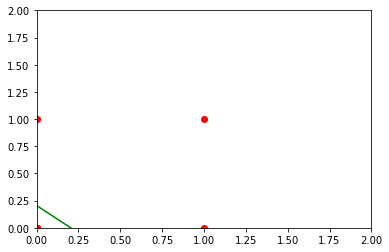

In [4]:
import matplotlib.pyplot as plt

for i, j in x:
    plt.scatter(x[i], x[j], color = "red")
plt.xlim([0, 2])
plt.ylim([0, 2])

X = np.arange(0, 2)
Y = - (model.w[0] * X + model.b) / model.w[1] 

plt.plot(X, Y, color = "green")

